In [20]:
# GHOST - Advection Test (1D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh1D
from Discretization import SpatialDiscretization
from Solver import Solver

# set up periodic mesh
mesh = Mesh1D("mesh1d", 0.0, 1.0, 10)
left = [1.0, 0.0]
right = [1.0, 1.0]
mesh.add_bc_on_hyperplanes([left,right],[1,2])
mesh.make_periodic([1,2])

# discretization order
p = 2

# volume quadrature order
tau = 2*p+1

# solver parameters
params = {"project_title": "adv_test_1d",
        "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.array([1.0]),
          "wave_speed": np.ones(1),
          "upwind_parameter": 1.0,
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "time_integrator": "rk44",
         "final_time": 10.0,
         "time_step_scale": 0.5}

# set up solver
solver = Solver(params,mesh)

dt =  0.01


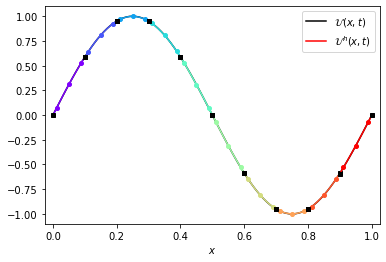

In [21]:
solver.run()
solver.post_process()
solver.plot(plot_nodes=True)